In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1703.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_111.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1393.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1098.png
/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/

In [2]:
import os
from PIL import Image
import numpy as np

In [3]:
#This cell imports the dataset from the kaggle website
dataset_dir = '/kaggle/input/the-healthcare-dataset'
image_files = []

for dirname, _, filenames in os.walk(dataset_dir):
    class_name = os.path.basename(dirname)
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append((class_name, os.path.join(dirname, filename)))

print(f"Total images found: {len(image_files)}")
print("Sample:", image_files[:5])

Total images found: 20172
Sample: [('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1354.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_612.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1748.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_236.png'), ('4 1 Ophthalmic Retinal Imaging', '/kaggle/input/the-healthcare-dataset/Sample Dataset 2/val/4 1 Ophthalmic Retinal Imaging/Retina_1996.png')]


In [4]:
map_counts = []
map_brightness = []

for class_name, filepath in image_files:
    # Map for counting images
    map_counts.append((class_name, 1))
    
    # Map for brightness
    img = Image.open(filepath).convert("L")  # grayscale
    brightness = np.mean(np.array(img))
    map_brightness.append((class_name, brightness))

In [5]:
#reduce part of the MapReduce
reduce_counts = {}
for class_name, value in map_counts:
    reduce_counts[class_name] = reduce_counts.get(class_name, 0) + value

In [6]:
brightness_sums = {}
brightness_counts = {}
for class_name, brightness in map_brightness:
    brightness_sums[class_name] = brightness_sums.get(class_name, 0) + brightness
    brightness_counts[class_name] = brightness_counts.get(class_name, 0) + 1

average_brightness = {cls: brightness_sums[cls] / brightness_counts[cls] for cls in brightness_sums}

In [7]:
#Number of images per class
print("\nNumber of images per class:")
for cls, count in reduce_counts.items():
    print(f"{cls}: {count}")


Number of images per class:
4 1 Ophthalmic Retinal Imaging: 1000
2 3 Lymphatic Tissue: 1000
1 2 Benign Melanocytic Lesions: 1004
2 7 Stromal Tissue: 1000
2 5 Muscular Tissue: 1000
2 4 Mucosal Tissue: 1000
5 5 Dental Radiographic Imaging: 1000
2 1 Cervical Cytopathological Imaging: 1000
5 1 Capsule Endoscopic Imaging: 1077
1 1 Benign Keratotic Lesions: 1000
5 3 Normal-Z-Esophagitis: 1000
5 2 Dyed-Polyps-Margins: 1013
1 4 Pre-Cancerous Lesions: 1109
5 4 Ulcerative Colitis Polyps: 1000
3 2 Thoracic Radiographic Imaging: 1000
2 6 Normal Tissue: 1000
1 3 Malignant Lesions: 996
2 2 Adipose Tissue: 1000
3 1 Orthopedic Radiographic Imaging: 973
2 8 Tumor Tissue: 1000


In [8]:
#Average brightness per class
print("\nAverage brightness per class:")
for cls, avg in average_brightness.items():
    print(f"{cls}: {avg:.2f}")


Average brightness per class:
4 1 Ophthalmic Retinal Imaging: 144.42
2 3 Lymphatic Tissue: 145.96
1 2 Benign Melanocytic Lesions: 153.19
2 7 Stromal Tissue: 158.18
2 5 Muscular Tissue: 159.23
2 4 Mucosal Tissue: 172.06
5 5 Dental Radiographic Imaging: 105.14
2 1 Cervical Cytopathological Imaging: 169.26
5 1 Capsule Endoscopic Imaging: 86.83
1 1 Benign Keratotic Lesions: 142.16
5 3 Normal-Z-Esophagitis: 121.83
5 2 Dyed-Polyps-Margins: 80.01
1 4 Pre-Cancerous Lesions: 134.81
5 4 Ulcerative Colitis Polyps: 84.19
3 2 Thoracic Radiographic Imaging: 121.95
2 6 Normal Tissue: 155.09
1 3 Malignant Lesions: 137.17
2 2 Adipose Tissue: 202.33
3 1 Orthopedic Radiographic Imaging: 65.80
2 8 Tumor Tissue: 146.00


In [9]:
#feature extraction
features = []
labels = []

for class_name, filepath in image_files:
    img = Image.open(filepath).convert("L").resize((64, 64))  # resize to reduce dimensionality
    hist = np.histogram(np.array(img).flatten(), bins=64, range=(0, 256))[0]  # 64-bin histogram
    features.append(hist)
    labels.append(class_name)

features = np.array(features)

In [10]:
#Encode labels into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

                                       precision    recall  f1-score   support

         1 1 Benign Keratotic Lesions       0.41      0.36      0.38       182
       1 2 Benign Melanocytic Lesions       0.57      0.53      0.55       219
                1 3 Malignant Lesions       0.45      0.22      0.29       212
            1 4 Pre-Cancerous Lesions       0.52      0.69      0.59       217
2 1 Cervical Cytopathological Imaging       0.78      0.85      0.81       204
                   2 2 Adipose Tissue       0.91      0.98      0.95       208
                 2 3 Lymphatic Tissue       0.87      0.85      0.86       181
                   2 4 Mucosal Tissue       0.71      0.78      0.74       196
                  2 5 Muscular Tissue       0.80      0.71      0.76       191
                    2 6 Normal Tissue       0.64      0.69      0.66       192
                   2 7 Stromal Tissue       0.77      0.76      0.76       212
                     2 8 Tumor Tissue       0.79   

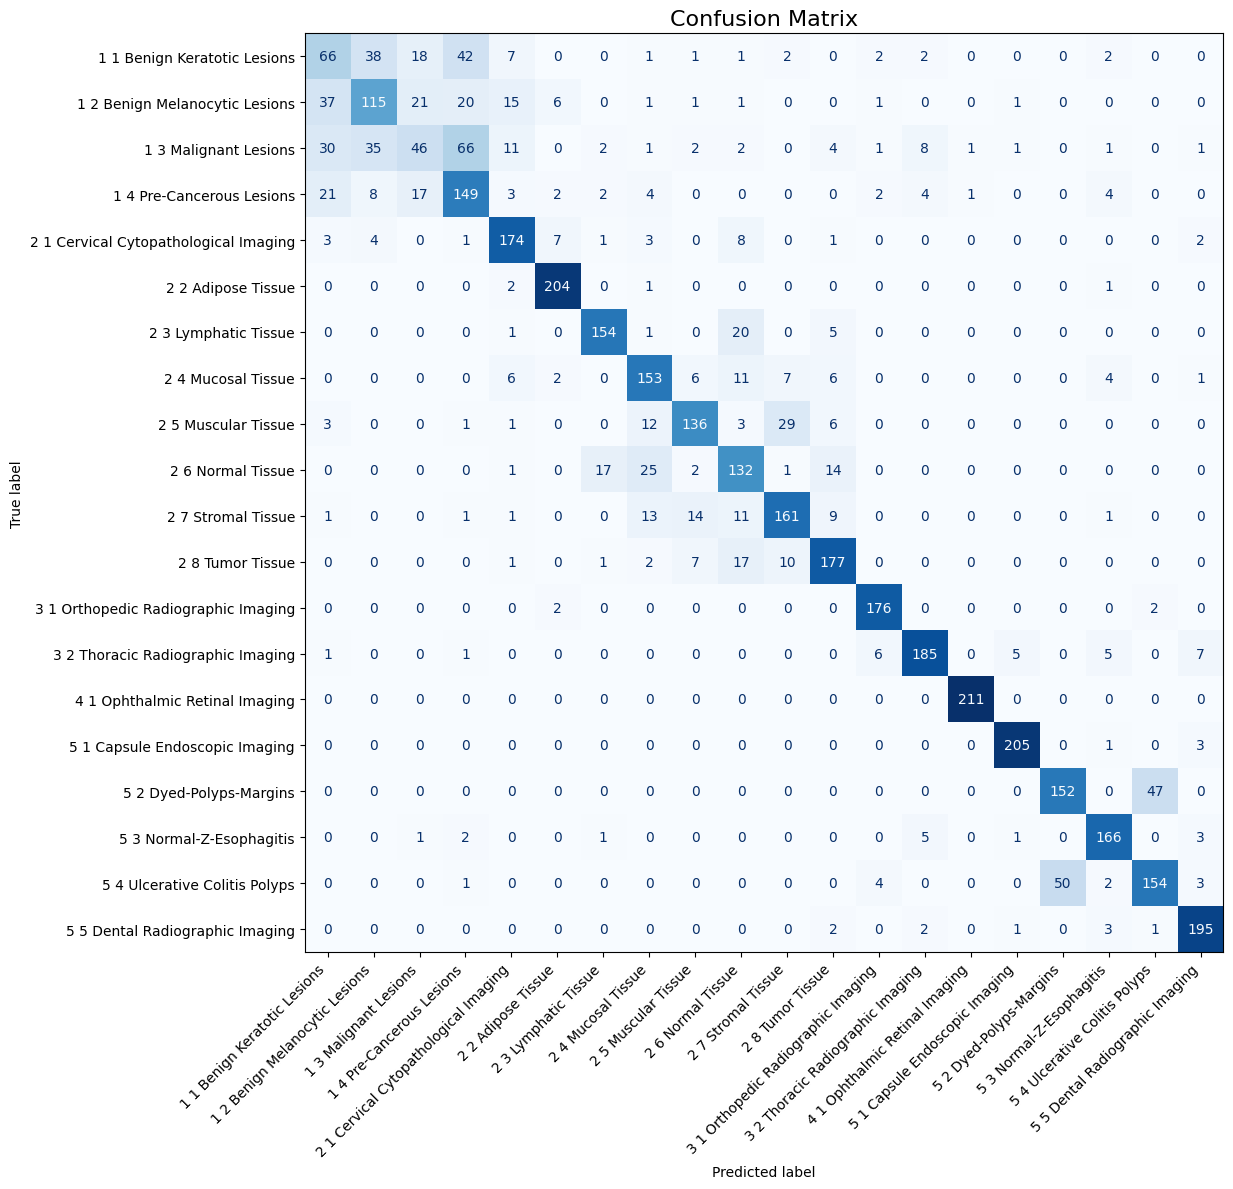

=== Evaluation Metrics ===
Accuracy:  0.7710
Precision: 0.7627
Recall:    0.7710
F1-score:  0.7635

=== Classification Report ===
                                       precision    recall  f1-score   support

         1 1 Benign Keratotic Lesions       0.41      0.36      0.38       182
       1 2 Benign Melanocytic Lesions       0.57      0.53      0.55       219
                1 3 Malignant Lesions       0.45      0.22      0.29       212
            1 4 Pre-Cancerous Lesions       0.52      0.69      0.59       217
2 1 Cervical Cytopathological Imaging       0.78      0.85      0.81       204
                   2 2 Adipose Tissue       0.91      0.98      0.95       208
                 2 3 Lymphatic Tissue       0.87      0.85      0.86       181
                   2 4 Mucosal Tissue       0.71      0.78      0.74       196
                  2 5 Muscular Tissue       0.80      0.71      0.76       191
                    2 6 Normal Tissue       0.64      0.69      0.66       192


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix
fig, ax = plt.subplots(figsize=(20, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.savefig("/kaggle/working/confusion_matrix.png", dpi=300)
plt.show()

# Print key performance metrics
print("=== Evaluation Metrics ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Detailed per-class report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

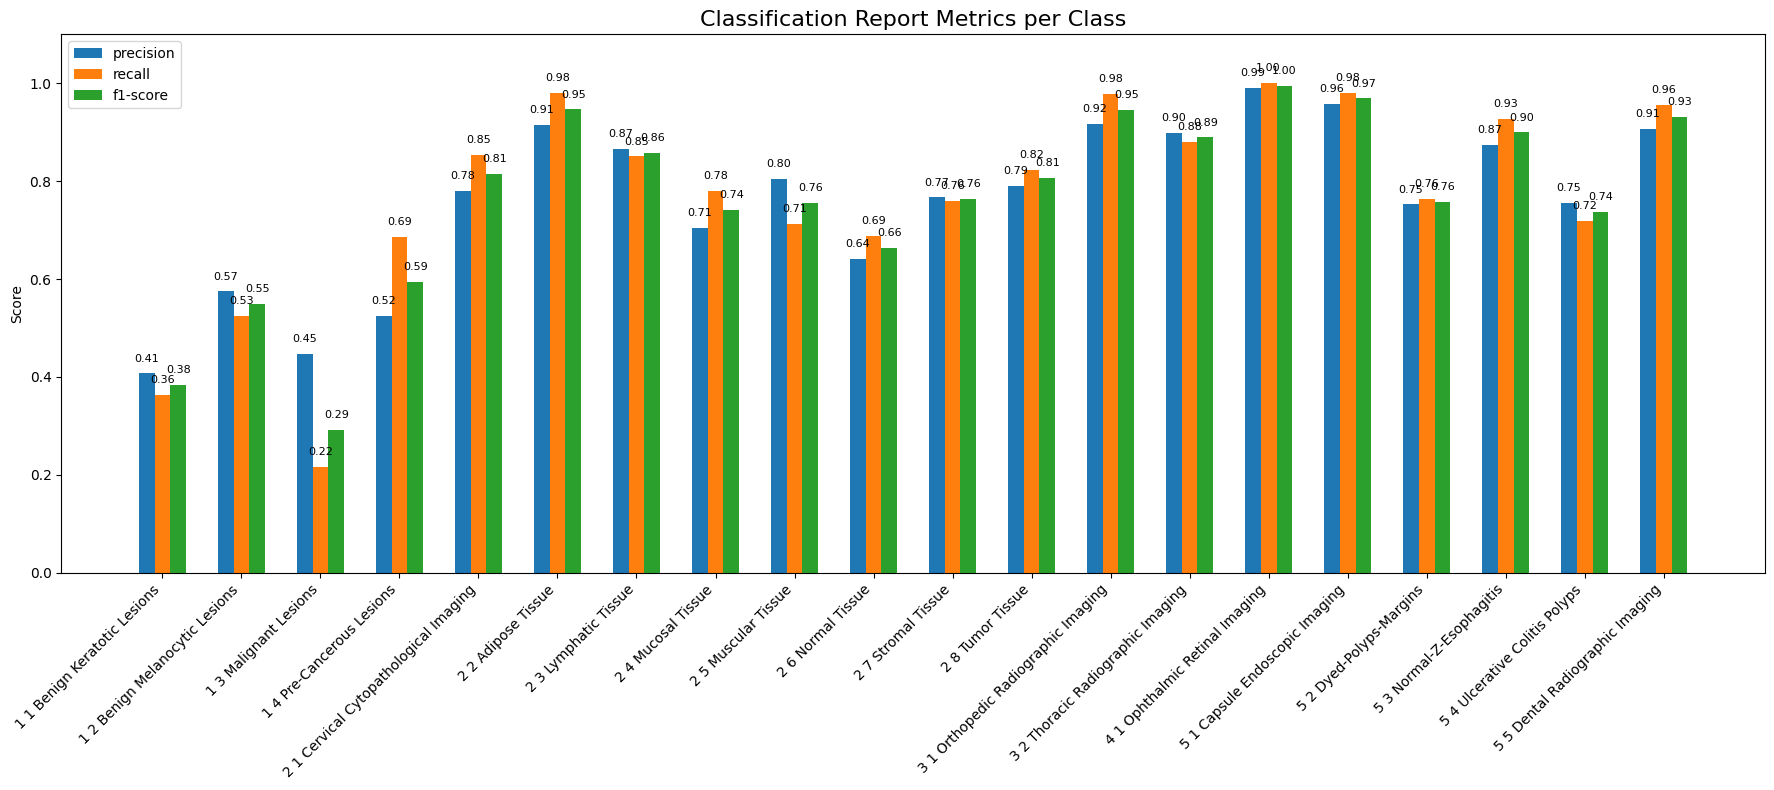

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']].iloc[:-3]  # exclude 'accuracy', 'macro avg', 'weighted avg'

# Setup bar positions
classes = metrics_df.index
n_classes = len(classes)
metrics = ['precision', 'recall', 'f1-score']
bar_width = 0.2
x = np.arange(n_classes)  # positions for classes

# Plot each metric with spacing
fig, ax = plt.subplots(figsize=(18, 8))
for i, metric in enumerate(metrics):
    bars = ax.bar(x + i*bar_width, metrics_df[metric], width=bar_width, label=metric)
    
    # Label each bar slightly above it
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.02,  # small vertical offset
            f'{height:.2f}', 
            ha='center', 
            va='bottom', 
            fontsize=8
        )

# Customize plot
ax.set_xticks(x + bar_width)  # center x-ticks under group
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_ylim(0, 1.1)
ax.set_ylabel("Score")
ax.set_title("Classification Report Metrics per Class", fontsize=16)
ax.legend()
plt.tight_layout()

# Save figure
plt.savefig("/kaggle/working/classification_report_clean.png", dpi=300)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

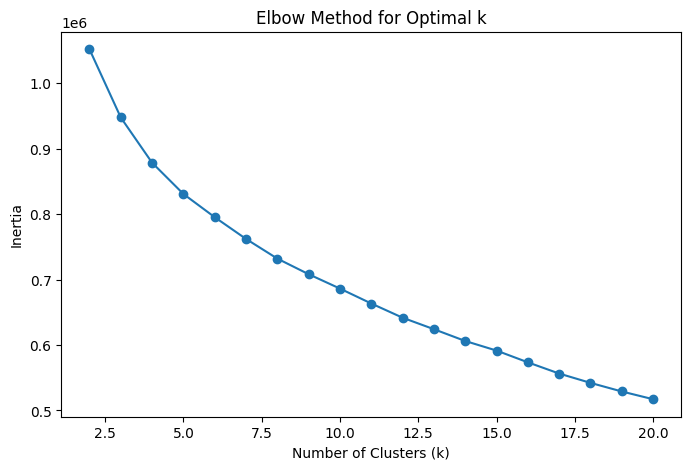

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(2, 21)  # test k from 2 to 20

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [16]:
from sklearn.cluster import KMeans

num_clusters = 10  # you can try 20 to match original classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

cluster_labels = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels, cluster_labels)
nmi = normalized_mutual_info_score(labels, cluster_labels)

print(f"ARI: {ari:.2f}, NMI: {nmi:.2f}")

ARI: 0.15, NMI: 0.35


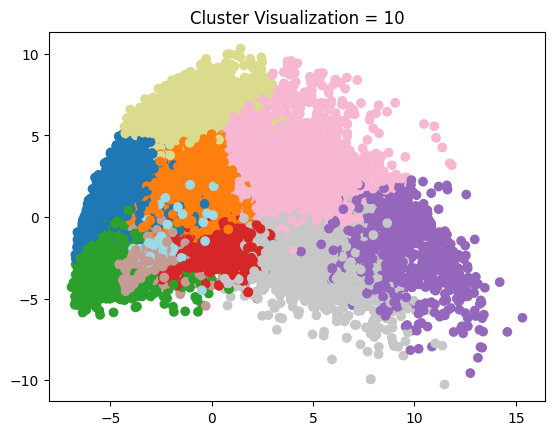

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.scatter(features_2d[:,0], features_2d[:,1], c=cluster_labels, cmap='tab20')
plt.title("Cluster Visualization = 10")
plt.show()

In [20]:
import pandas as pd

df = pd.DataFrame({'True_Label': labels, 'Cluster': cluster_labels})
print(df.groupby(['Cluster', 'True_Label']).size())

Cluster  True_Label                           
0        1 1 Benign Keratotic Lesions             265
         1 2 Benign Melanocytic Lesions           297
         1 3 Malignant Lesions                    249
         1 4 Pre-Cancerous Lesions                310
         2 1 Cervical Cytopathological Imaging     51
                                                 ... 
9        2 7 Stromal Tissue                         1
         2 8 Tumor Tissue                          19
         3 2 Thoracic Radiographic Imaging          3
         4 1 Ophthalmic Retinal Imaging             6
         5 3 Normal-Z-Esophagitis                   1
Length: 140, dtype: int64


In [21]:
from sklearn.cluster import KMeans

num_clusters = 20  # you can try 20 to match original classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

cluster_labels2 = kmeans.labels_

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
ari = adjusted_rand_score(labels, cluster_labels2)
nmi = normalized_mutual_info_score(labels, cluster_labels2)

print(f"ARI: {ari:.2f}, NMI: {nmi:.2f}")

ARI: 0.16, NMI: 0.37


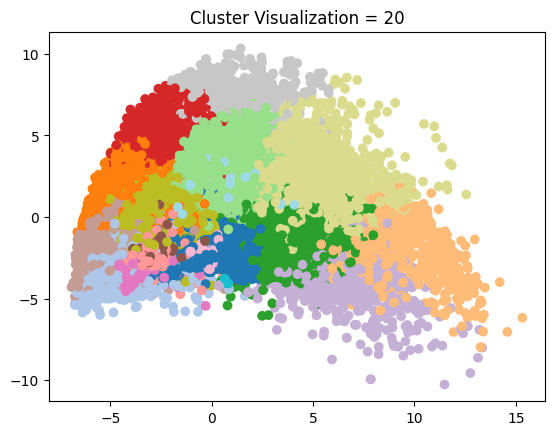

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.scatter(features_2d[:,0], features_2d[:,1], c=cluster_labels2, cmap='tab20')
plt.title("Cluster Visualization = 20")
plt.show()

In [25]:
df = pd.DataFrame({'True_Label': labels, 'Cluster': cluster_labels2})
print(df.groupby(['Cluster', 'True_Label']).size())

Cluster  True_Label                         
0        1 1 Benign Keratotic Lesions            88
         1 2 Benign Melanocytic Lesions          31
         1 3 Malignant Lesions                  131
         1 4 Pre-Cancerous Lesions              192
         3 1 Orthopedic Radiographic Imaging    665
                                               ... 
19       2 4 Mucosal Tissue                       6
         2 5 Muscular Tissue                     51
         2 6 Normal Tissue                        1
         2 8 Tumor Tissue                        19
         3 2 Thoracic Radiographic Imaging        1
Length: 202, dtype: int64
